In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, array_to_img

from skimage.color import rgb2lab, lab2rgb
from skimage.transform import resize
from skimage.io import imsave, imshow

from mpl_toolkits.axes_grid1 import ImageGrid

import random

In [15]:
path = '../dataset/'
dataset = "tiny-imagenet-200/"

In [9]:
SIZE = 64 # this is the target size of the entire process

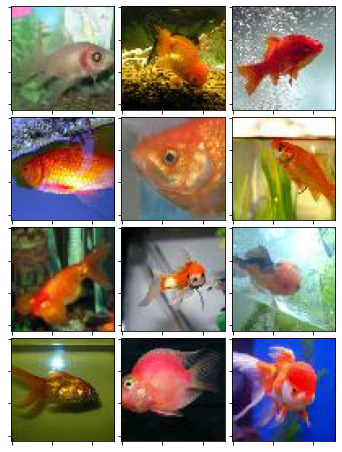

In [10]:
visualization_path = path+"download/"+dataset+"train/n01443537/images/" # modify here to load images from a different folder
images = []
for img_path in os.listdir(visualization_path)[:12]:    
    
    img_color = []
    img = img_to_array(load_img(visualization_path+img_path))
    
    img = resize(img, (SIZE,SIZE))
    images.append(img)
    
fig = plt.figure(figsize=(8., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for ax, im in zip(grid, images):
    # Iterating over the grid returns the Axes.
    ax.imshow(im.astype('uint8'))
    ax.set_yticklabels([])
    ax.set_xticklabels([])

plt.show()

In [27]:
datagen = ImageDataGenerator(rescale=1. / 255)
train_gen = datagen.flow_from_directory(path+"download/"+dataset+"train/", 
                                          target_size=(SIZE, SIZE), 
                                          class_mode=None)
valid_gen = datagen.flow_from_directory(path+"download/"+dataset+"val/", 
                                          target_size=(SIZE, SIZE), 
                                          class_mode=None)
test_gen = datagen.flow_from_directory(path+"download/"+dataset+"test/", 
                                          target_size=(SIZE, SIZE), 
                                          class_mode=None)

Found 100000 images belonging to 200 classes.
Found 10000 images belonging to 1 classes.
Found 10000 images belonging to 1 classes.


In [55]:
# Convert from RGB to Lab space
"""
by iterating on each image, we convert the RGB to Lab. 
Think of LAB image as a grey image in L channel and all color info stored in A and B channels. 
The input to the network will be the L channel, so I assign L channel to X vector. 
And assign A and B to Y.
"""

def convert_dataset(gen):
    X = []
    Y = []
    for i in tqdm(range(len(gen))):
        for img in gen[i]:
            lab = rgb2lab(img)
            X.append(lab[:,:,0]) 
            Y.append(lab[:,:,1:] / 128)
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape(X.shape+(1,))
    print(X.shape, Y.shape)
    return X,Y

In [56]:
X_train,Y_train = convert_dataset(train_gen)
X_valid,Y_valid = convert_dataset(valid_gen)
# X_test,Y_test = convert_dataset(test_gen)

  0%|                                                                                          | 0/313 [00:00<?, ?it/s]

(100000, 64, 64, 1) (100000, 64, 64, 2)


100%|████████████████████████████████████████████████████████████████████████████████| 313/313 [01:31<00:00,  3.44it/s]


(10000, 64, 64, 1) (10000, 64, 64, 2)


In [57]:
np.save('../preprocessed/'+dataset+'x_train.npy', X_train)
np.save('../preprocessed/'+dataset+'y_train.npy', Y_train)

np.save('../preprocessed/'+dataset+'x_valid.npy', X_valid)
np.save('../preprocessed/'+dataset+'y_valid.npy', Y_valid)

# np.save('../preprocessed/'+dataset+'x_test.npy', X_test)
# np.save('../preprocessed/'+dataset+'y_test.npy', Y_test)